# Experiment 2

This experiment explore the growth of local networks in CBN with Linear topology. Its important see what happened with the Linear CBN with more local networks

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# df = pd.read_csv("outputs/exp2_cores_8_5/data.csv")
# df = pd.read_csv("outputs/exp2_cores_8_250/data.csv")
# df = pd.read_csv("outputs/exp2_cores_8_250_fixed/data.csv")
df = pd.read_csv("outputs/exp2_cores_8_250_fixed/data190.csv")
# df = pd.read_csv("outputs/exp2_cores_8_250_fixed/data104.csv")
df.keys()

Index(['i_sample', 'n_cores', 'step', 'method', 'execution_time'], dtype='object')

In [52]:
df

,i_sample,n_cores,step,method,execution_time
0,1,2,1,1,0.489766
1,1,2,1,2,0.318303
2,1,2,1,3,0.312604
3,1,2,2,1,0.000631
4,1,2,2,2,0.041990
...,...,...,...,...,...
11947,190,16,2,2,0.416762
11948,190,16,2,3,0.412763
11949,190,16,3,1,0.039110
11950,190,16,3,2,2.838640


## General Statistics

### Statistics

In [53]:
mean_times = df.groupby(['step', 'method', 'n_cores'])['execution_time'].mean().reset_index()
table = mean_times.pivot(index=['step', 'method'], columns='n_cores', values='execution_time')
table

n_cores             2          4           8         12         16        20  \
step method                                                                    
1    1        0.592731   0.639097    0.603144  0.590117   0.606975  0.582024   
     2        0.426912   0.335679    0.377326  0.467599   0.539972  0.623082   
     3        0.424063   0.313694    0.373361  0.467732   0.539278  0.632747   
2    1        0.000744   0.000723    0.000673  0.000641   0.000607  0.000562   
     2        0.101861   0.148192    0.243030  0.334230   0.405673  0.491337   
     3        0.098964   0.143041    0.239742  0.330957   0.405122  0.489206   
3    1       24.347349  59.734494  103.501352  9.956974  26.326970  6.029908   
     2       57.752272  73.255520   68.742914  6.621275  14.897961  5.631751   
     3       60.512666  73.673708   69.414128  6.691993  15.830892  5.679489   

n_cores             24  
step method             
1    1        0.593784  
     2        0.676227  
     3        0.683147  
2    1        0.000541  
     2        0.554527  
     3        0.553090  
3    1       98.392559  
     2       40.578445  
     3       41.163429

In [54]:
import pandas as pd

# Calcular tiempos medios de ejecución agrupados por step, method y n_cores
mean_times = df.groupby(['step', 'method', 'n_cores'])['execution_time'].mean().reset_index()

# Ordenar y pivotar la tabla para que las columnas correspondan a n_cores
mean_times = mean_times.sort_values(by=['step', 'method', 'n_cores'])
table = mean_times.pivot(index=['step', 'method'], columns='n_cores', values='execution_time')

# Convertir el índice en columnas y renombrar para la presentación
table_reset = table.reset_index().rename(columns={'step': 'Stage', 'method': 'Method'})

# Lista de columnas: las dos primeras son Stage y Method, el resto son los valores de n_cores
cols = table_reset.columns.tolist()
n_core_cols = len(cols) - 2

# Definir el formato de columnas para LaTeX: "c" para Stage, "l" para Method y "r" para cada columna de n_cores
col_format = "c|l|" + "r|" * n_core_cols
col_format = col_format.rstrip("|")

# Construir la cadena LaTeX
latex_str = "\\begin{tabular}{" + col_format + "}\n\\hline\n"
latex_str += " &  & \\multicolumn{" + str(n_core_cols) + "}{c}{\\textbf{\\# of Cores}} \\\\ \\hline\n"
latex_str += "{\\bf Stage} & {\\bf Method} " + " & ".join([f"{{\\bf {col}}}" for col in cols[2:]]) + " \\\\ \\hline\n"

# Agrupar por Stage para combinar las celdas correspondientes
grouped = table_reset.groupby("Stage")
for stage, group in grouped:
    n_rows = group.shape[0]
    first = True
    for _, row in group.iterrows():
        # Para la primera fila del grupo, se usa multirow para el Stage
        stage_cell = f"\\multirow{{{n_rows}}}{{*}}{{Step {int(stage)}}}" if first else ""
        first = False
        row_line = f"{stage_cell} & {row['Method']}"
        # Para cada columna de n_cores se formatea el valor con 4 decimales y se añade "s" (segundos)
        for col in cols[2:]:
            val = row[col]
            cell = f"{val:.4f}s" if not pd.isna(val) else "--"
            row_line += " & " + cell
        row_line += " \\\\"
        latex_str += row_line + "\n"
    latex_str += "\\hline\n"
latex_str += "\\end{tabular}"

print(latex_str)


\begin{tabular}{c|l|r|r|r|r|r|r|r}
\hline
 &  & \multicolumn{7}{c}{\textbf{\# of Cores}} \\ \hline
{\bf Stage} & {\bf Method} {\bf 2} & {\bf 4} & {\bf 8} & {\bf 12} & {\bf 16} & {\bf 20} & {\bf 24} \\ \hline
\multirow{3}{*}{Step 1} & 1.0 & 0.5927s & 0.6391s & 0.6031s & 0.5901s & 0.6070s & 0.5820s & 0.5938s \\
 & 2.0 & 0.4269s & 0.3357s & 0.3773s & 0.4676s & 0.5400s & 0.6231s & 0.6762s \\
 & 3.0 & 0.4241s & 0.3137s & 0.3734s & 0.4677s & 0.5393s & 0.6327s & 0.6831s \\
\hline
\multirow{3}{*}{Step 2} & 1.0 & 0.0007s & 0.0007s & 0.0007s & 0.0006s & 0.0006s & 0.0006s & 0.0005s \\
 & 2.0 & 0.1019s & 0.1482s & 0.2430s & 0.3342s & 0.4057s & 0.4913s & 0.5545s \\
 & 3.0 & 0.0990s & 0.1430s & 0.2397s & 0.3310s & 0.4051s & 0.4892s & 0.5531s \\
\hline
\multirow{3}{*}{Step 3} & 1.0 & 24.3473s & 59.7345s & 103.5014s & 9.9570s & 26.3270s & 6.0299s & 98.3926s \\
 & 2.0 & 57.7523s & 73.2555s & 68.7429s & 6.6213s & 14.8980s & 5.6318s & 40.5784s \\
 & 3.0 & 60.5127s & 73.6737s & 69.4141s & 6.6920s & 15.830

### Boxplots and Violin Plots

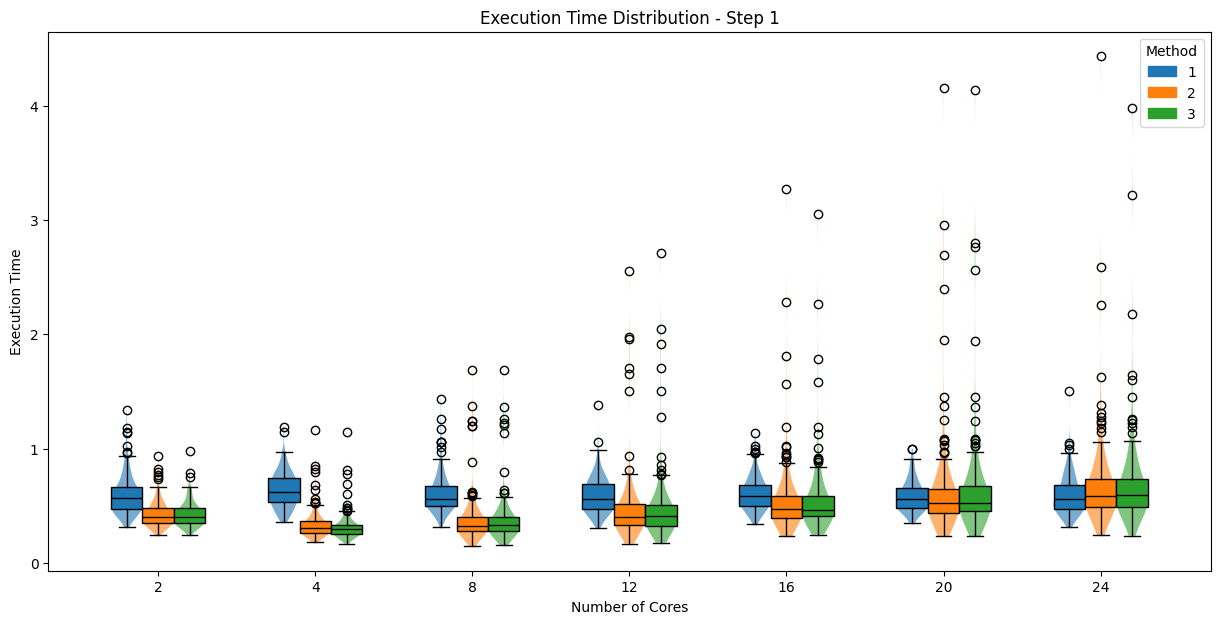

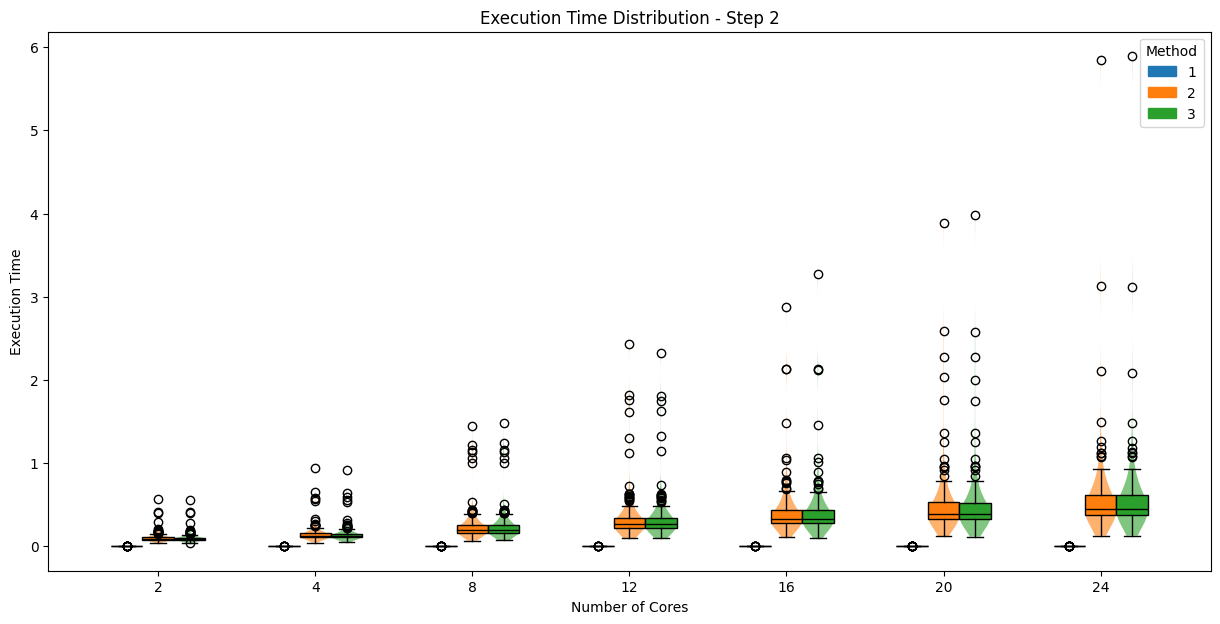

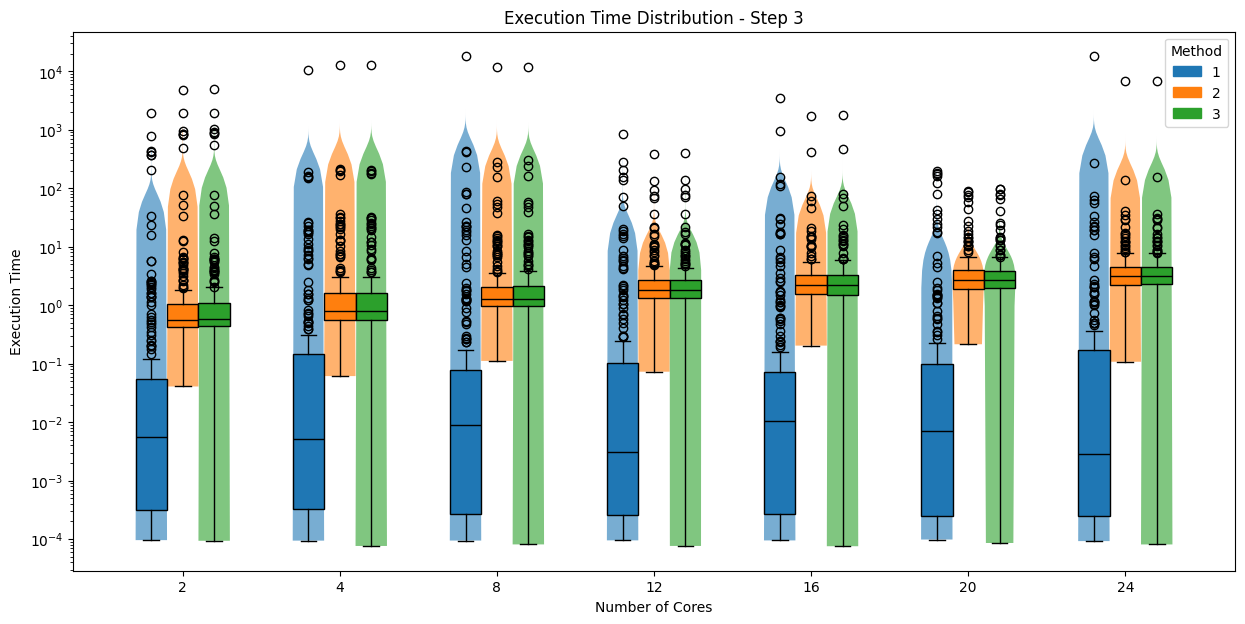

In [55]:
# Unique values for steps and methods
steps = sorted(df['step'].unique())
methods = df['method'].unique()
n_cores_values = sorted(df['n_cores'].unique())

# Plot boxplots and violin plots
for step in steps:
    fig, ax = plt.subplots(figsize=(15, 7))
    positions = np.arange(len(n_cores_values))  # Posiciones en el eje X para cada valor de n_cores
    width = 0.2  # Ancho de cada caja/violin

    # Boxplots para cada método
    for i, method in enumerate(methods):
        data = [
            df[(df['step'] == step) & (df['method'] == method) & (df['n_cores'] == n)]
            ['execution_time'].dropna()
            for n in n_cores_values
        ]
        ax.boxplot(
            data,
            positions=positions + i * width - width,
            widths=width,
            patch_artist=True,
            boxprops=dict(facecolor=f"C{i}"),
            medianprops=dict(color='black')
        )

    # Violin plots para cada método
    for i, method in enumerate(methods):
        data = [
            df[(df['step'] == step) & (df['method'] == method) & (df['n_cores'] == n)]
            ['execution_time'].dropna().values
            for n in n_cores_values
        ]
        parts = ax.violinplot(
            data,
            positions=positions + i * width - width,
            widths=width,
            showmeans=False,
            showextrema=False,
            showmedians=False
        )
        for pc in parts['bodies']:
            pc.set_facecolor(f"C{i}")
            pc.set_alpha(0.6)

    ax.set_xticks(positions)
    ax.set_xticklabels(n_cores_values)
    ax.set_xlabel("Number of Cores")
    ax.set_ylabel("Execution Time")
    ax.set_title(f"Execution Time Distribution - Step {step}")
    ax.legend(
        [plt.Rectangle((0, 0), 1, 1, color=f"C{i}") for i in range(len(methods))],
        methods,
        title="Method"
    )

    # Para el step 2, usar escala logarítmica en el eje Y
    if step == 3:
        ax.set_yscale('log')

    plt.show()


### Histograms

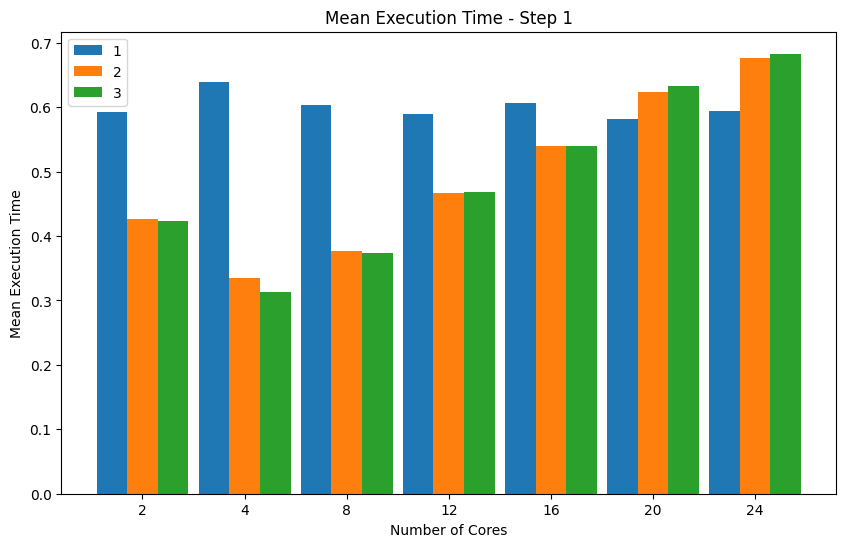

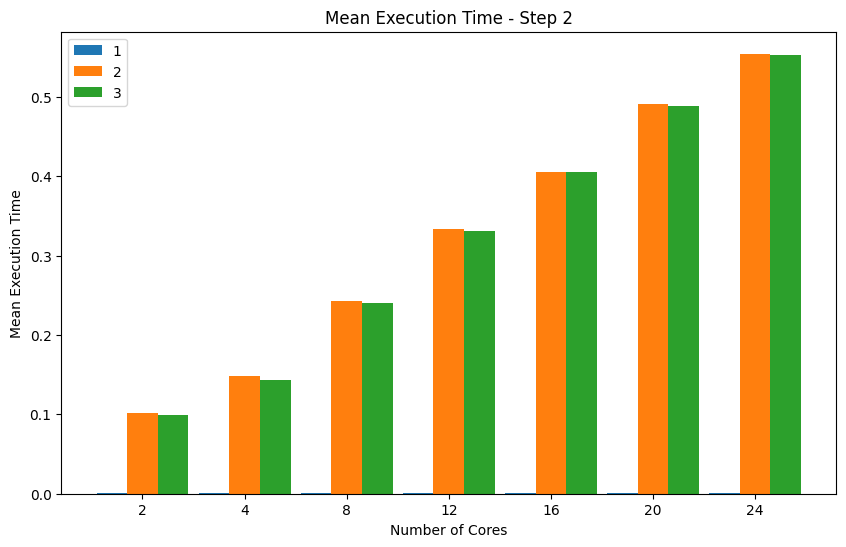

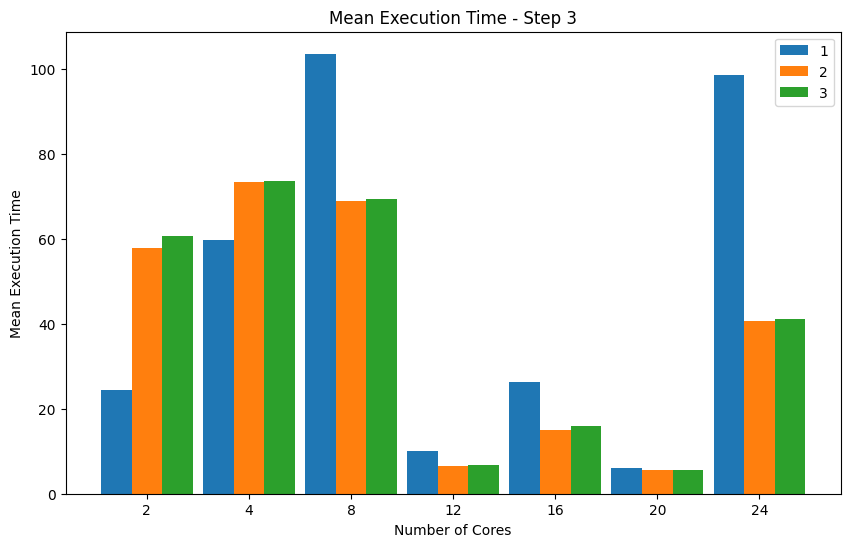

In [56]:
# Crear boxplots y violin plots para los tiempos de ejecución agrupados por step y method
unique_steps = df['step'].unique()
unique_methods = df['method'].unique()
unique_n_cores = sorted(df['n_cores'].unique())

# Crear histogramas para los tiempos de ejecución promedio por step
for step in unique_steps:
    fig, ax = plt.subplots(figsize=(10, 6))
    data_step = mean_times[mean_times['step'] == step]

    width = 0.3  # Ancho de cada barra
    positions = np.arange(len(unique_n_cores))

    for i, method in enumerate(unique_methods):
        means = [
            data_step[
                (data_step['n_cores'] == n) & (data_step['method'] == method)
            ]['execution_time'].values[0]
            if not data_step[(data_step['n_cores'] == n) & (data_step['method'] == method)].empty
            else 0
            for n in unique_n_cores
        ]
        ax.bar(positions + i * width, means, width=width, label=method, color=f"C{i}")

    ax.set_xticks(positions + width)
    ax.set_xticklabels(unique_n_cores)
    ax.set_xlabel("Number of Cores")
    ax.set_ylabel("Mean Execution Time")
    ax.set_title(f"Mean Execution Time - Step {step}")
    ax.legend()
    plt.show()

